# Classification

### What is classification

* Classification is a supervised learning concept which basically categorizes a set of data into classes. 
* The most common classification problems are – speech recognition, face detection, handwriting recognition, document classification, etc. It can be either a binary classification problem or a multi-class problem too.

### Classification Algorithms 
* Logistic Regression
* Naive Bayes
* Stochastic Gradient Descent
* K-Nearest Neighbors
* Decision Tree
* Random Forest
* Artificial Neural Network
* Support Vector Machine
* XGBoost
* Light GBM
* CatBoost 

#### Read more 
* https://dzone.com/articles/introduction-to-classification-algorithms
* https://analyticsindiamag.com/7-types-classification-algorithms/
* https://www.edureka.co/blog/classification-in-machine-learning/#:~:text=In%20machine%20learning%2C%20classification%20is,recognition%2C%20document%20classification%2C%20etc.

### Applications of Classification Algorithms

* Email spam classification.
* Bank customers loan pay willingness prediction.
* Cancer tumor cell identification.
* Sentiment analysis.
* Drugs classification.
* Facial keypoints detection.
* Pedestrian detection in automotive car driving.
* Fraud Detection.

# Credit Risk Management: Classification Models & Hyperparameter Tuning

### Business Application

Credit Score Cards are one of the common risk control methods in the financial industry which uses personal information and transactional records to identify and evaluate the creditworthiness of existing and potential customers. 
There are a number of different use cases leveraging this measure such as 
* loan management,
* credit card approval, 
* credit limit extension, etc.

### Dataset
* The dataset used in this project is shared publicly via Kaggle, 
https://www.kaggle.com/rikdifos/credit-card-approval-prediction
* Which includes 2 sub-sets: personal information and transactional records. 
* We will utilise and merge both files into one dataset to make the analysis more insightful and actionable.

# Agenda
* This end-to-end project aims to solve a classification problem in Data Science, particularly in finance industry
* Exploratory Data Analysis (EDA) and Feature Engineering
* Feature Scaling and Selection (+ Imbalanced Data Handling)
* Machine Learning Modelling

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Explanatory Data Analysis

In [65]:
#personal informations applications
application = pd.read_csv("data/application_record.csv")
application.columns = map(str.lower, application.columns)
application.head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [66]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   438557 non-null  int64  
 1   code_gender          438557 non-null  object 
 2   flag_own_car         438557 non-null  object 
 3   flag_own_realty      438557 non-null  object 
 4   cnt_children         438557 non-null  int64  
 5   amt_income_total     438557 non-null  float64
 6   name_income_type     438557 non-null  object 
 7   name_education_type  438557 non-null  object 
 8   name_family_status   438557 non-null  object 
 9   name_housing_type    438557 non-null  object 
 10  days_birth           438557 non-null  int64  
 11  days_employed        438557 non-null  int64  
 12  flag_mobil           438557 non-null  int64  
 13  flag_work_phone      438557 non-null  int64  
 14  flag_phone           438557 non-null  int64  
 15  flag_email       

In [67]:
# transactional information
credit = pd.read_csv("data/credit_record.csv")
credit.columns = map(str.lower, credit.columns)
credit.head()

,id,months_balance,status
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [68]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   id              1048575 non-null  int64 
 1   months_balance  1048575 non-null  int64 
 2   status          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [69]:
#Convert status column to numeric
credit.status = credit.status.replace({'X':-2, 'C': -1})
credit.status = credit.status.astype('int')
credit.status = credit.status.apply(lambda x:x+1)

In [70]:
credit.head()

,id,months_balance,status
0,5001711,0,-1
1,5001711,-1,1
2,5001711,-2,1
3,5001711,-3,1
4,5001712,0,0


In [8]:
#Find the latest month
credit_month = credit.groupby('id').months_balance.max().reset_index()
credit_month.head()

,id,months_balance
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


In [74]:
credit_month["months_balance"].unique()

array([  0,  -1, -22,  -4, -10,  -8, -14,  -3, -28,  -2,  -9, -11, -40,
       -24, -38,  -7, -18, -32,  -6, -43, -19, -17, -15, -12, -33,  -5,
       -51, -47, -21, -34, -29, -35, -49, -31, -42, -20, -23, -44, -37,
       -13, -46, -25, -39, -56, -36, -16, -26, -27, -48, -41, -30, -45,
       -55, -52, -50, -53, -54, -57, -59, -60, -58], dtype=int64)

In [75]:
#Merge the df with latest months matched with its status
record = pd.merge(credit_month, credit, how="inner", on=["id", "months_balance"])
record.head()

,id,months_balance,status
0,5001711,0,-1
1,5001712,0,0
2,5001713,0,-1
3,5001714,0,-1
4,5001715,0,-1


In [72]:
record.months_balance.unique()

array([  0,  -1, -22,  -4, -10,  -8, -14,  -3, -28,  -2,  -9, -11, -40,
       -24, -38,  -7, -18, -32,  -6, -43, -19, -17, -15, -12, -33,  -5,
       -51, -47, -21, -34, -29, -35, -49, -31, -42, -20, -23, -44, -37,
       -13, -46, -25, -39, -56, -36, -16, -26, -27, -48, -41, -30, -45,
       -55, -52, -50, -53, -54, -57, -59, -60, -58], dtype=int64)

In [76]:
#Merge the record df with application df

df = pd.merge(application, record, on="id", how="inner")
df.head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members,months_balance,status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-22,-1


In [77]:
#Rename columns
df = df.rename(columns={'code_gender':'gender',
                   'flag_own_car':'car',
                   'flag_own_realty':'property',
                   'cnt_children':'children',
                   'amt_income_total':'annual_income',
                   'name_income_type':'income_type',
                   'name_education_type':'education',
                   'name_family_status':'family_status',
                   'name_housing_type':'housing_type',
                   'days_birth':'birth_date',
                   'days_employed':'employment',
                   'flag_mobil':'mobile_phone',
                   'flag_work_phone':'work_phone',
                   'flag_phone':'phone',
                   'flag_email': 'email',
                   'cnt_fam_members':'fam_members'
                   })
df.head()

,id,gender,car,property,children,annual_income,income_type,education,family_status,housing_type,birth_date,employment,mobile_phone,work_phone,phone,email,occupation_type,fam_members,months_balance,status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-22,-1


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               36457 non-null  int64  
 1   gender           36457 non-null  object 
 2   car              36457 non-null  object 
 3   property         36457 non-null  object 
 4   children         36457 non-null  int64  
 5   annual_income    36457 non-null  float64
 6   income_type      36457 non-null  object 
 7   education        36457 non-null  object 
 8   family_status    36457 non-null  object 
 9   housing_type     36457 non-null  object 
 10  birth_date       36457 non-null  int64  
 11  employment       36457 non-null  int64  
 12  mobile_phone     36457 non-null  int64  
 13  work_phone       36457 non-null  int64  
 14  phone            36457 non-null  int64  
 15  email            36457 non-null  int64  
 16  occupation_type  25134 non-null  object 
 17  fam_members 

In [79]:
df.isna().sum()

id                     0
gender                 0
car                    0
property               0
children               0
annual_income          0
income_type            0
education              0
family_status          0
housing_type           0
birth_date             0
employment             0
mobile_phone           0
work_phone             0
phone                  0
email                  0
occupation_type    11323
fam_members            0
months_balance         0
status                 0
dtype: int64

In [80]:
#Fill null values
df.occupation_type = df.occupation_type.fillna("Others")

In [81]:
df.head()

,id,gender,car,property,children,annual_income,income_type,education,family_status,housing_type,birth_date,employment,mobile_phone,work_phone,phone,email,occupation_type,fam_members,months_balance,status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Others,2.0,0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Others,2.0,0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-22,-1


In [82]:
df.isna().sum()

id                 0
gender             0
car                0
property           0
children           0
annual_income      0
income_type        0
education          0
family_status      0
housing_type       0
birth_date         0
employment         0
mobile_phone       0
work_phone         0
phone              0
email              0
occupation_type    0
fam_members        0
months_balance     0
status             0
dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_income'>

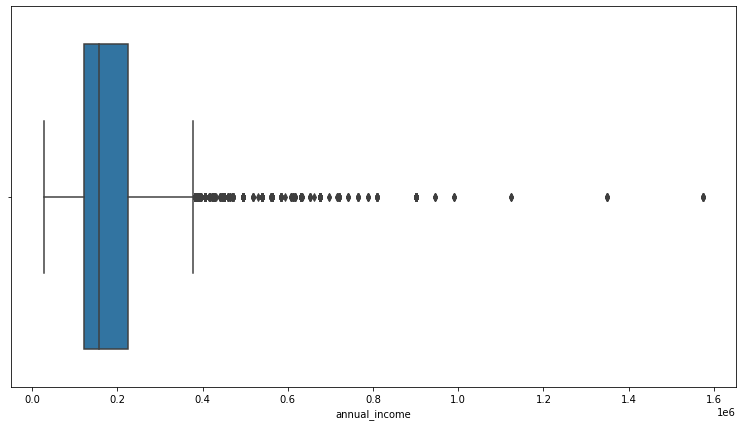

In [83]:
#Detect and remove outliers: Annual_income

plt.figure(figsize=(13,7))
sns.boxplot(df.annual_income)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_income'>

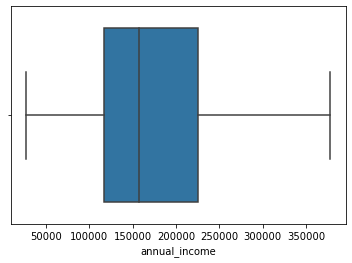

In [84]:
#Option: Z-score or IQR, z-score only for Gaugassian distribution => IQR

def remove_outlier(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    cutoff = iqr*1.5
    lower = q1 - cutoff
    upper = q3 + cutoff
    return lower, upper

lower, upper = remove_outlier(df.annual_income)

df = df.loc[(df.annual_income > lower) & (df.annual_income < upper)]

sns.boxplot(df.annual_income)

<AxesSubplot:xlabel='fam_members'>

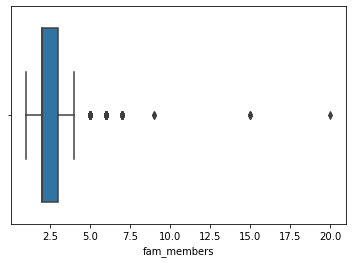

In [85]:
#Detect and remove outliers: Fam_members

sns.boxplot(x=df.fam_members)

2.0    18729
1.0     6721
3.0     6057
4.0     2976
Name: fam_members, dtype: int64

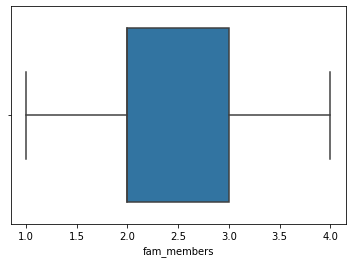

In [87]:
lower , upper = remove_outlier(df.fam_members)

df = df.loc[(df.fam_members>lower) & (df.fam_members <upper)]

sns.boxplot(x=df.fam_members)

df.fam_members.value_counts()

In [22]:
df.shape

(34483, 20)

In [88]:
#Define target variable
df.status.value_counts()

 0    17052
-1     9079
 1     7997
 2      262
 6       64
 3       18
 4        6
 5        5
Name: status, dtype: int64

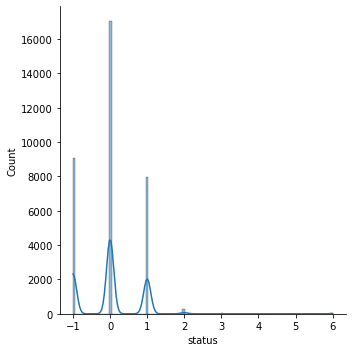

In [89]:
sns.displot(x=df.status, kde=True)

In [90]:
#Target = 1 if status >=1 (with due debt), else Target = 0
df['target'] = None
df.loc[df.status < 1,'target']=0
df.loc[df.status >= 1,'target']=1
df.target = pd.to_numeric(df.target)
df.head()

,id,gender,car,property,children,annual_income,income_type,education,family_status,housing_type,...,employment,mobile_phone,work_phone,phone,email,occupation_type,fam_members,months_balance,status,target
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,0,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,0,1,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-22,-1,0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,0,0,0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,0,0,0


In [26]:
df.target.value_counts()

0    26131
1     8352
Name: target, dtype: int64

In [91]:
#Drop unnecessary columns
df.drop(columns=['months_balance', 'status', 'mobile_phone', 'id'],inplace=True)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34483 entries, 2 to 36456
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           34483 non-null  object 
 1   car              34483 non-null  object 
 2   property         34483 non-null  object 
 3   children         34483 non-null  int64  
 4   annual_income    34483 non-null  float64
 5   income_type      34483 non-null  object 
 6   education        34483 non-null  object 
 7   family_status    34483 non-null  object 
 8   housing_type     34483 non-null  object 
 9   birth_date       34483 non-null  int64  
 10  employment       34483 non-null  int64  
 11  work_phone       34483 non-null  int64  
 12  phone            34483 non-null  int64  
 13  email            34483 non-null  int64  
 14  occupation_type  34483 non-null  object 
 15  fam_members      34483 non-null  float64
 16  target           34483 non-null  int64  
dtypes: float64(2

In [94]:
#Convert object dtype to category dtype for feature processing
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].astype('category')

df.dtypes

gender             category
car                category
property           category
children              int64
annual_income       float64
income_type        category
education          category
family_status      category
housing_type       category
birth_date            int64
employment            int64
work_phone            int64
phone                 int64
email                 int64
occupation_type    category
fam_members         float64
target                int64
dtype: object

In [95]:
df.head().T

,2,3,4,5,6
gender,M,F,F,F,F
car,Y,N,N,N,N
property,Y,Y,Y,Y,Y
children,0,0,0,0,0
annual_income,112500.0,270000.0,270000.0,270000.0,270000.0
income_type,Working,Commercial associate,Commercial associate,Commercial associate,Commercial associate
education,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special
family_status,Married,Single / not married,Single / not married,Single / not married,Single / not married
housing_type,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment
birth_date,-21474,-19110,-19110,-19110,-19110


### 2. Feature engineering

In [96]:
#Transform birth_date and employment to positive numbers
df['age'] = df.birth_date.apply(lambda x: round(x/-365,0))
df['year_of_employment'] = df.employment.apply(lambda x: round(x/-365,0) if x<0 else 0)

df = df.drop(columns=["birth_date","employment"])

In [97]:
df.head()

,gender,car,property,children,annual_income,income_type,education,family_status,housing_type,work_phone,phone,email,occupation_type,fam_members,target,age,year_of_employment
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,0,59.0,3.0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,1,52.0,8.0
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,0,52.0,8.0
5,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,0,52.0,8.0
6,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,0,52.0,8.0


### Data leakage  
*Data leakage is when information from outside the training dataset is used to create the model. This additional information can allow the model to learn or know something that it otherwise would not know and in turn invalidate the estimated performance of the model being constructed.

In [34]:
df_a = df #for 2.1. encoding without target

In [98]:
y_a = df_a['target']
x_a = df_a.drop(columns=['target'])
x_a.head(3)

,gender,car,property,children,annual_income,income_type,education,family_status,housing_type,work_phone,phone,email,occupation_type,fam_members,age,year_of_employment
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,59.0,3.0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,52.0,8.0
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,52.0,8.0


In [99]:
# Pre-requisite: train test split to avoid data leakage

from sklearn.model_selection import train_test_split

x_a_train, x_a_test, y_a_train, y_a_test = train_test_split(x_a, y_a, test_size=0.3, random_state=1, stratify=y_a)

In [37]:
#2.1. Encoding WITHOUT target (using df_a)

In [100]:
#2.1.1 Binary variables: gender, car, property

#Option 1: Label Encoder (applied to >2 categories per variable)
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

le = LabelEncoder()

#Apply to x_train and x_test

x_a_train.loc[:, 'gender'] = le.fit_transform(x_a_train.loc[:, 'gender'])
x_a_train.loc[:, 'car'] = le.fit_transform(x_a_train.loc[:, 'car'])
x_a_train.loc[:, 'property'] = le.fit_transform(x_a_train.loc[:, 'property'])

x_a_test.loc[:, 'gender'] = le.fit_transform(x_a_test.loc[:, 'gender'])
x_a_test.loc[:, 'car'] = le.fit_transform(x_a_test.loc[:, 'car'])
x_a_test.loc[:, 'property'] = le.fit_transform(x_a_test.loc[:, 'property'])

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [101]:
x_a_train.head()

,gender,car,property,children,annual_income,income_type,education,family_status,housing_type,work_phone,phone,email,occupation_type,fam_members,age,year_of_employment
24794,1,0,1,1,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Managers,3.0,30.0,8.0
27346,1,1,0,0,247500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Managers,2.0,53.0,19.0
22384,1,1,0,1,202500.0,Working,Secondary / secondary special,Married,With parents,0,1,0,Sales staff,3.0,33.0,10.0
8220,0,0,1,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,0,0,0,Others,2.0,49.0,0.0
27443,1,1,0,0,157500.0,Working,Secondary / secondary special,Separated,House / apartment,0,1,0,Security staff,1.0,47.0,2.0


In [102]:
#2.1.2. Nominal variables: income_type, education, family_status, housing_type, occupation_type

#Option 1: Dummy Coding: kn - k variables

income_type_dummy = pd.get_dummies(x_a_train.income_type)
print(income_type_dummy)

#Option 2: OneHotEncoder: kn variables

from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(sparse=False, drop='first', handle_unknown='error')

#As OneHotEncoder of sklearn was designed to keep the consistency in the number of categories across train and
#test set, so we can control any category which doesn't appear in train set with "handle_unknown="error""

#Apply for x_train set

nominal = onehot.fit_transform(x_a_train[['income_type', 'education', 'family_status', 'housing_type', 
                                             'occupation_type']])
df_nominal = pd.DataFrame(index=x_a_train.index, data=nominal, columns=onehot.get_feature_names(['income_type', 'education', 'family_status',
                                                                        'housing_type', 'occupation_type']))
x_a_train = pd.concat([x_a_train, df_nominal], axis=1)
x_a_train.head().T

       Commercial associate  Pensioner  State servant  Student  Working
24794                     0          0              0        0        1
27346                     0          0              0        0        1
22384                     0          0              0        0        1
8220                      0          1              0        0        0
27443                     0          0              0        0        1
...                     ...        ...            ...      ...      ...
14139                     0          0              0        0        1
15856                     1          0              0        0        0
9232                      0          0              1        0        0
4898                      1          0              0        0        0
2785                      0          0              0        0        1

[24138 rows x 5 columns]


,24794,27346,22384,8220,27443
gender,1,1,1,0,1
car,0,1,1,0,1
property,1,0,0,1,0
children,1,0,1,0,0
annual_income,112500.0,247500.0,202500.0,180000.0,157500.0
income_type,Working,Working,Working,Pensioner,Working
education,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special
family_status,Married,Married,Married,Married,Separated
housing_type,House / apartment,House / apartment,With parents,House / apartment,House / apartment
work_phone,0,0,0,0,0


In [103]:
x_a_train.drop(columns=['income_type', 'education', 'family_status', 'housing_type', 'occupation_type'], inplace=True)
x_a_train.head().T

,24794,27346,22384,8220,27443
gender,1.0,1.0,1.0,0.0,1.0
car,0.0,1.0,1.0,0.0,1.0
property,1.0,0.0,0.0,1.0,0.0
children,1.0,0.0,1.0,0.0,0.0
annual_income,112500.0,247500.0,202500.0,180000.0,157500.0
work_phone,0.0,0.0,0.0,0.0,0.0
phone,0.0,0.0,1.0,0.0,1.0
email,0.0,0.0,0.0,0.0,0.0
fam_members,3.0,2.0,3.0,2.0,1.0
age,30.0,53.0,33.0,49.0,47.0


In [104]:
nominal_test = onehot.fit_transform(x_a_test[['income_type', 'education', 'family_status', 'housing_type', 
                                             'occupation_type']])
df_nominal_test = pd.DataFrame(index=x_a_test.index, data=nominal_test, columns=onehot.get_feature_names(['income_type', 'education', 'family_status',
                                                                        'housing_type', 'occupation_type']))
x_a_test = pd.concat([x_a_test, df_nominal_test], axis=1)
x_a_test.drop(columns=['income_type', 'education', 'family_status', 'housing_type', 'occupation_type'], inplace=True)
x_a_test.head()

,gender,car,property,children,annual_income,work_phone,phone,email,fam_members,age,...,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Others,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff
20747,0,0,0,0,67500.0,0,0,0,2.0,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12627,0,0,1,0,225000.0,0,0,0,2.0,55.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18102,0,0,0,0,180000.0,0,0,1,1.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23612,0,1,0,0,225000.0,1,0,0,2.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25067,1,0,0,0,90000.0,0,0,0,2.0,51.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


(array([12722.,  5359.,  2787.,  1647.,   660.,   433.,   319.,   124.,
           47.,    40.]),
 array([ 0. ,  4.3,  8.6, 12.9, 17.2, 21.5, 25.8, 30.1, 34.4, 38.7, 43. ]),
 <BarContainer object of 10 artists>)

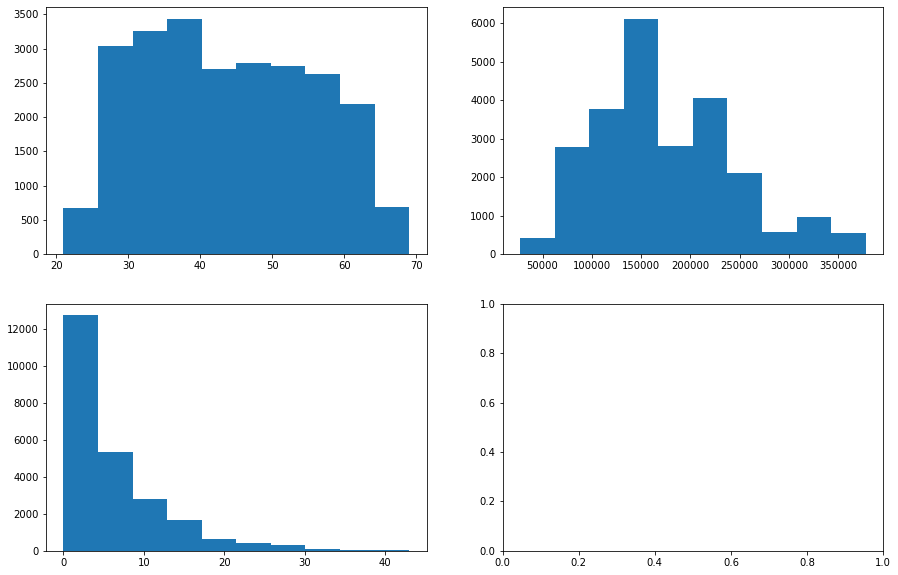

In [105]:
#2.1.3. Continuous variables: annual_income, age, year_of_employment

fig, ax = plt.subplots(2,2,figsize=(15,10))

ax[0][0].hist(x_a_train.age)
ax[0][1].hist(x_a_train.annual_income)
ax[1][0].hist(x_a_train.year_of_employment)

In [106]:
#Option: Fixed-width binning (rounding) or Adaptive binning (quantiles)
#Here, we apply adaptive binning since fixed-width binning requires pre-defining the bins (which is subjective)

#Apply to x_train set

x_a_train['age_binned'] = pd.qcut(x_a_train.age, q=[0, .25, .50, .75, 1])
x_a_train['annual_income_binned'] = pd.qcut(x_a_train.annual_income, q=[0, .25, .50, .75, 1])
x_a_train['year_of_employment_binned'] = pd.qcut(x_a_train.year_of_employment, q=[0, .25, .50, .75, 1])

x_a_train.drop(columns=['age', 'annual_income', 'year_of_employment'], inplace=True)

#Since each category is divided into 4 equal bins, we can apply Label Encoder without bias

x_a_train['age'] = le.fit_transform(x_a_train['age_binned'])
x_a_train['annual_income'] = le.fit_transform(x_a_train['annual_income_binned'])
x_a_train['year_of_employment'] = le.fit_transform(x_a_train['year_of_employment_binned'])

x_a_train.drop(columns=['age_binned','annual_income_binned', 'year_of_employment_binned'],inplace=True)
x_a_train.head()

,gender,car,property,children,work_phone,phone,email,fam_members,income_type_Pensioner,income_type_State servant,...,occupation_type_Others,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,age,annual_income,year_of_employment
24794,1,0,1,1,0,0,0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2
27346,1,1,0,0,0,0,0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3,3
22384,1,1,0,1,0,1,0,3.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,2,3
8220,0,0,1,0,0,0,0,2.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0
27443,1,1,0,0,0,1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,1,1


In [107]:
#Apply to x_test set

x_a_test['age_binned'] = pd.qcut(x_a_test.age, q=[0, .25, .50, .75, 1])
x_a_test['annual_income_binned'] = pd.qcut(x_a_test.annual_income, q=[0, .25, .50, .75, 1])
x_a_test['year_of_employment_binned'] = pd.qcut(x_a_test.year_of_employment, q=[0, .25, .50, .75, 1])

x_a_test.drop(columns=['age', 'annual_income', 'year_of_employment'], inplace=True)

#Since each category is divided into 5 equal bins, we can apply Label Encoder without bias

x_a_test['age'] = le.fit_transform(x_a_test['age_binned'])
x_a_test['annual_income'] = le.fit_transform(x_a_test['annual_income_binned'])
x_a_test['year_of_employment'] = le.fit_transform(x_a_test['year_of_employment_binned'])

x_a_test.drop(columns=['age_binned','annual_income_binned', 'year_of_employment_binned'],inplace=True)

In [109]:
x_a_test.head(3)

,gender,car,property,children,work_phone,phone,email,fam_members,income_type_Pensioner,income_type_State servant,...,occupation_type_Others,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,age,annual_income,year_of_employment
20747,0,0,0,0,0,0,0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
12627,0,0,1,0,0,0,0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,3
18102,0,0,0,0,0,0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2,1


In [110]:
#3. Feature Scaling (Data Standardization/Normalization)

#3.1. df_a (encoded without target)

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

ss = StandardScaler()
ss_train = ss.fit_transform(x_a_train)
x_a_train_ss = pd.DataFrame(ss_train)
x_a_train_ss.columns=x_a_train.columns
x_a_train_ss.head()

#Test
ss_test = ss.fit_transform(x_a_test)
x_a_test_ss = pd.DataFrame(ss_test)
x_a_test_ss.columns=x_a_test.columns
x_a_test_ss.head()

,gender,car,property,children,work_phone,phone,email,fam_members,income_type_Pensioner,income_type_State servant,...,occupation_type_Others,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,age,annual_income,year_of_employment
0,-0.688372,-0.760701,-1.401796,-0.606615,-0.538424,-0.649309,-0.299392,-0.198197,-0.469273,-0.291462,...,-0.685476,-0.098797,-0.044012,-0.32549,-0.066832,-0.127312,-0.073109,-0.397812,-1.333072,-1.252641
1,-0.688372,-0.760701,0.713370,-0.606615,-0.538424,-0.649309,-0.299392,-0.198197,-0.469273,-0.291462,...,-0.685476,-0.098797,-0.044012,-0.32549,-0.066832,-0.127312,-0.073109,1.398898,0.574874,1.455902
2,-0.688372,-0.760701,-1.401796,-0.606615,-0.538424,-0.649309,3.340103,-1.390259,-0.469273,-0.291462,...,-0.685476,-0.098797,-0.044012,-0.32549,-0.066832,-0.127312,-0.073109,-0.397812,0.574874,-0.349793
3,-0.688372,1.314577,-1.401796,-0.606615,1.857273,-0.649309,-0.299392,-0.198197,-0.469273,-0.291462,...,-0.685476,-0.098797,-0.044012,-0.32549,-0.066832,-0.127312,-0.073109,0.500543,0.574874,-0.349793
4,1.452702,-0.760701,-1.401796,-0.606615,-0.538424,-0.649309,-0.299392,-0.198197,-0.469273,-0.291462,...,1.458840,-0.098797,-0.044012,-0.32549,-0.066832,-0.127312,-0.073109,0.500543,-1.333072,-0.349793


In [111]:
#4. Dealing with imbalanced data (Random Undersampling / Oversampling (SMOTE))

#the same for both df_a and df_b set

a_target_0 = df_a[df_a.target == 0].target.count() / df_a.target.count()
a_target_1 = df_a[df_a.target == 1].target.count() / df_a.target.count()

print(a_target_0)
print(a_target_1)

0.7577936954441319
0.2422063045558681


In [115]:
df_a[df_a.target == 0].target.count()

26131

- install https://imbalanced-learn.readthedocs.io/
- conda install -c conda-forge imbalanced-learn

In [112]:
#4.1. Oversampling (SMOTE: Synthetic Minority Oversampling Technique)

from imblearn.over_sampling import SMOTE
from collections import Counter

oversample = SMOTE()

x_a_train_ss_over, y_a_train_over = oversample.fit_resample(x_a_train_ss, y_a_train)
print(Counter(y_a_train_over))

Counter({0: 18292, 1: 18292})


In [117]:
#4.2. Random Undersampling

from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler()

x_a_train_ss_under, y_a_train_under = undersample.fit_resample(x_a_train_ss, y_a_train)
print(Counter(y_a_train_under))

Counter({0: 5846, 1: 5846})


In [118]:
#Random Undersampling randomly select data from the majority class to delete from the dataset
#which might result in information loss during modeling

#SMOTE (Oversampling) duplicates data from the minority class which helps balance the distribution but does not
#provide any additional information to the model

#Apply to x_test_set
x_a_test_ss_over, y_a_test_over = oversample.fit_resample(x_a_test_ss, y_a_test)
print(Counter(y_a_test_over))

Counter({0: 7839, 1: 7839})


### 5. Feature Selection // Dimensionality Reduction

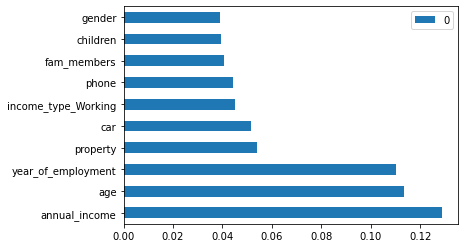

In [119]:
#5.1. Feature Importance

#5.1.1. Test on df_a set first
from sklearn.ensemble import ExtraTreesClassifier

fi = ExtraTreesClassifier()
fi_a = fi.fit(x_a_train_ss_over, y_a_train_over)

df_fi_a = pd.DataFrame(fi_a.feature_importances_,index=x_a_train_ss_over.columns)
df_fi_a.nlargest(10,df_fi_a.columns).plot(kind='barh')
plt.show()

income_type_Working                        0.009436
email                                      0.009538
family_status_Married                      0.014921
occupation_type_Cleaning staff             0.015746
occupation_type_Cooking staff              0.016416
occupation_type_Security staff             0.022159
age                                        0.022348
property                                   0.029481
education_Secondary / secondary special    0.029694
target                                     1.000000
Name: target, dtype: float64


<AxesSubplot:>

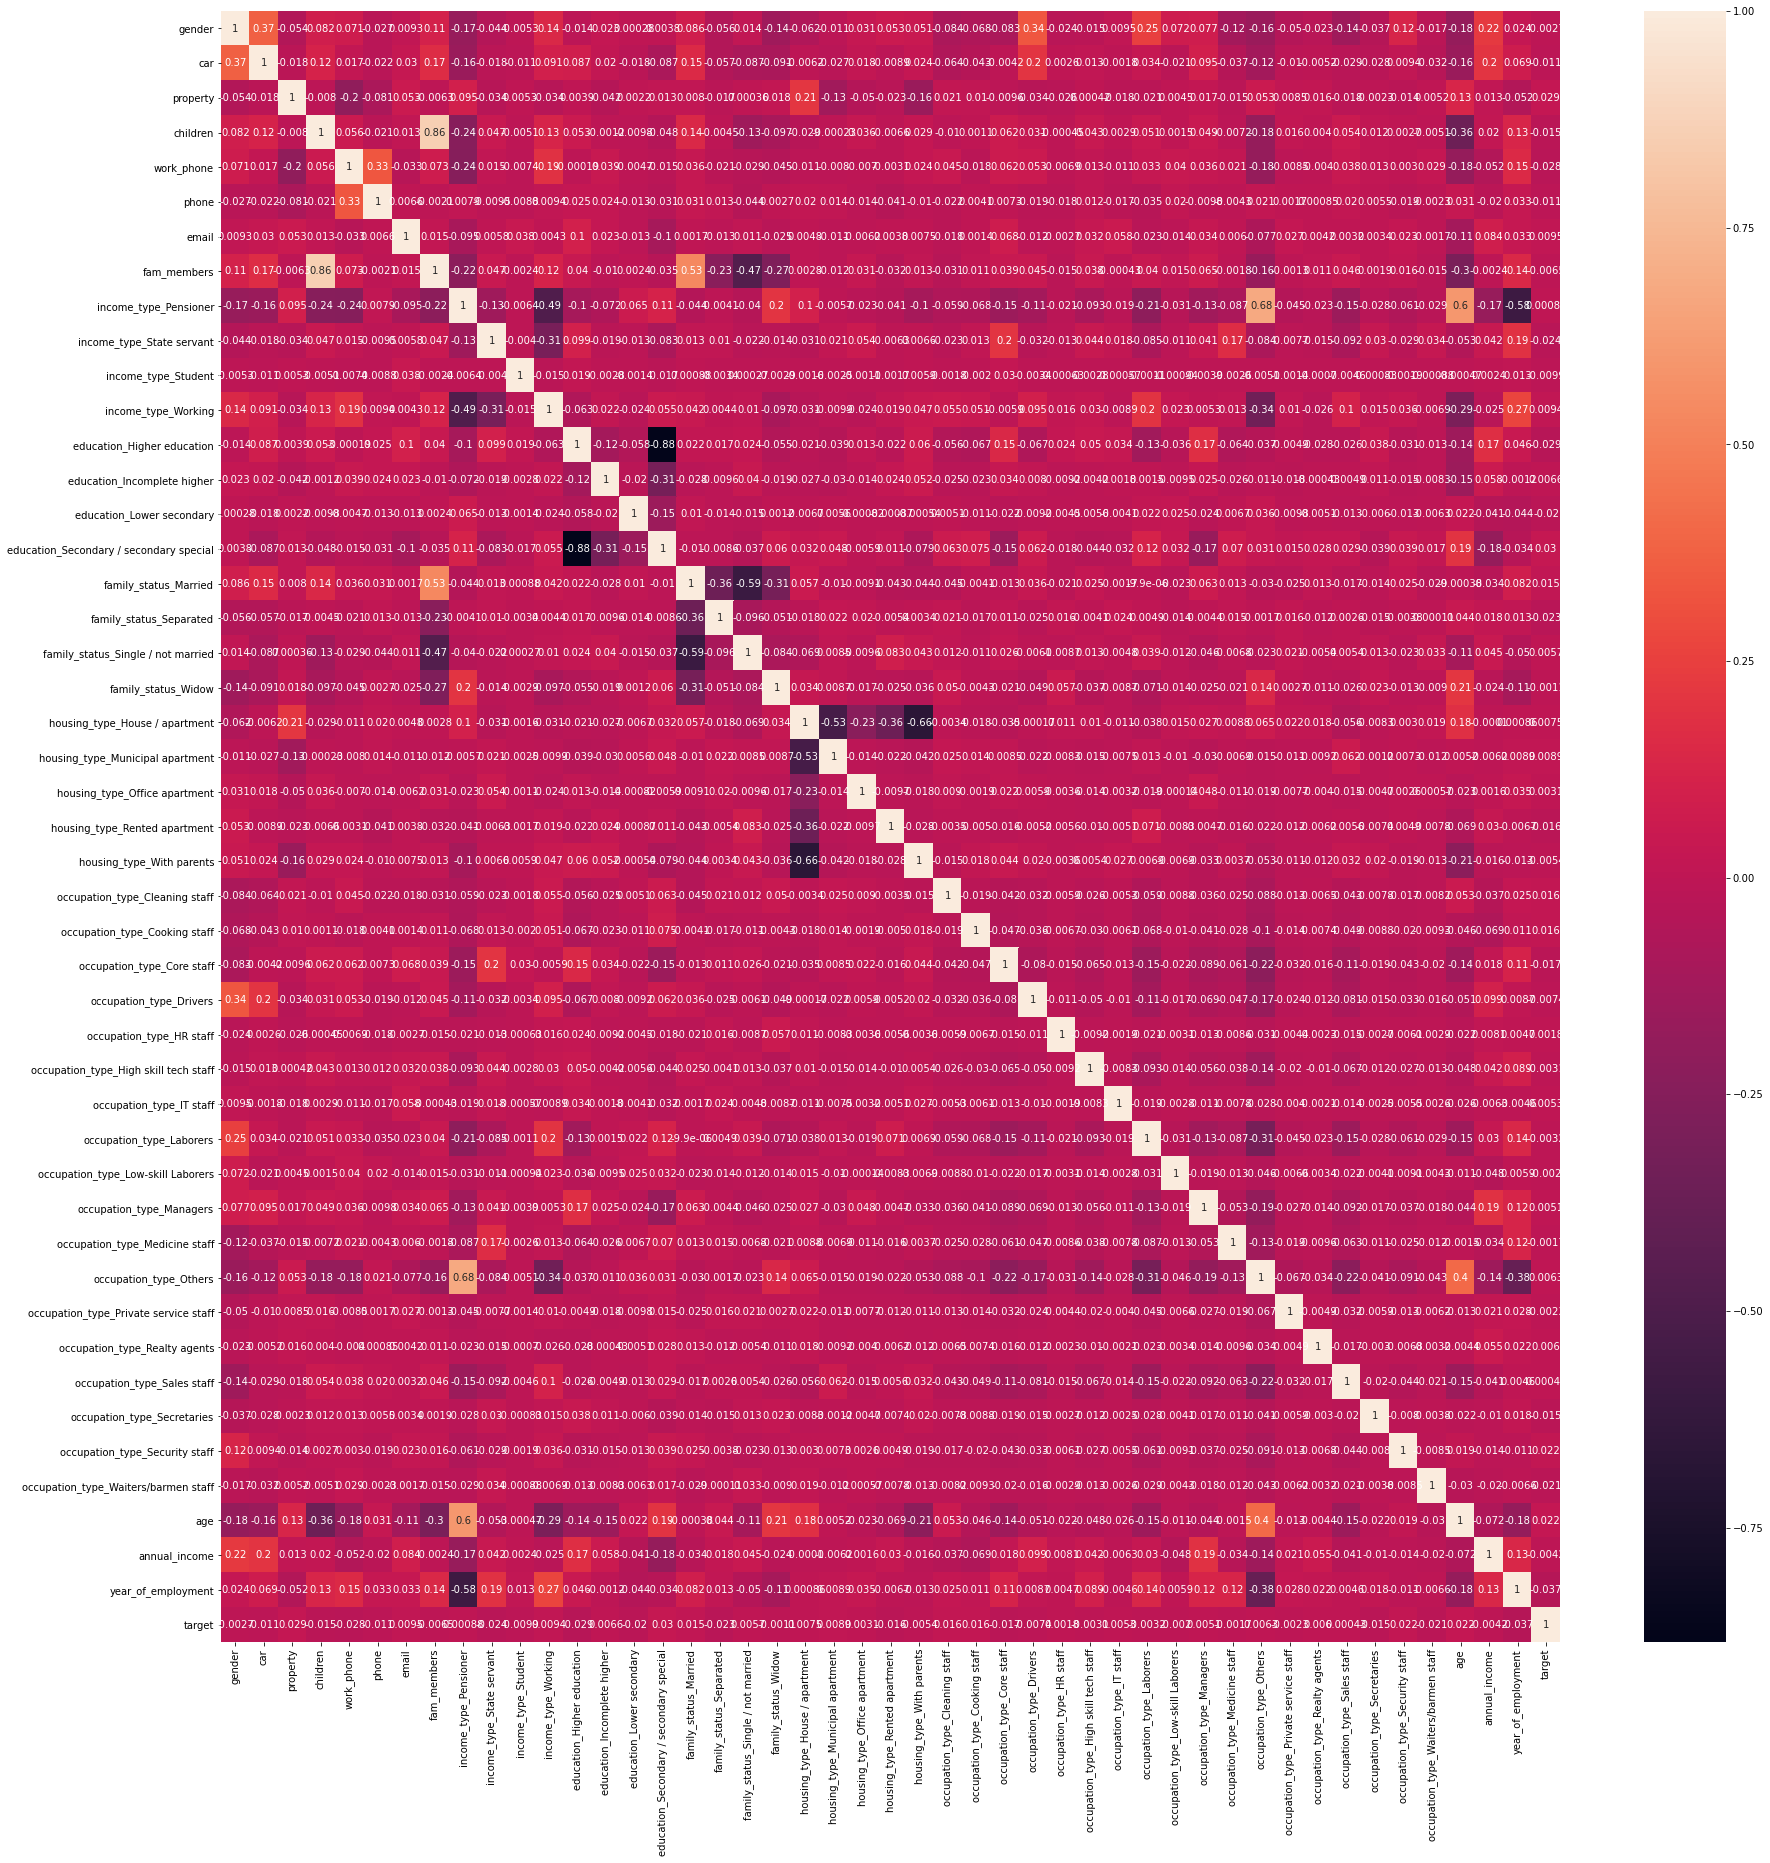

In [53]:
#5.2. Correlation Matrix

#5.2.1. Test on df_a set

df_a_train_processed = pd.concat([x_a_train_ss_over, y_a_train_over], axis=1) #combine processed features with their target

cm_a = df_a_train_processed.corr()

print(cm_a.target.sort_values().tail(10))

plt.figure(figsize=(30,30))
sns.heatmap(cm_a, xticklabels=df_a_train_processed.columns, yticklabels=df_a_train_processed.columns,annot=True)

In [54]:
x_a_train_ss_over.shape

(36584, 46)

33


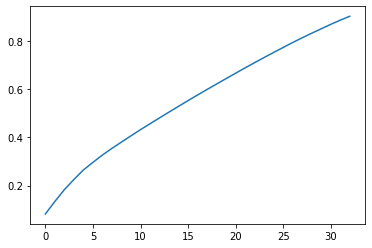

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,-1.838097,-1.461972,-0.461617,-0.401440,-0.213971,0.116616,-0.760382,0.869458,-0.568393,-0.391980,...,-0.778843,-0.586386,-0.643671,0.466035,0.587917,-0.482103,1.907557,1.308691,0.018582,0.669428
1,-1.546894,-0.478617,-0.075041,-1.037800,-1.830582,1.379351,1.109972,1.845131,-0.706658,-0.525805,...,-0.465818,-0.920047,-1.069416,-0.153206,0.561141,-0.420896,0.953056,1.815116,-0.763117,-0.818027
2,-3.403337,1.143849,-1.463987,3.661803,-0.152962,-1.185445,0.375024,0.364618,1.190073,-1.023541,...,-0.688848,-0.492650,-0.715753,-0.032224,1.612040,-1.092685,-1.067924,-0.164726,1.104659,-0.597598
3,2.994208,-1.465584,0.271498,0.717910,-0.361215,0.135791,-0.556558,-0.185013,-0.108360,0.061395,...,-0.264383,-0.471111,0.057404,-0.012399,0.144383,0.004201,-0.053727,0.249198,0.168507,0.061458
4,0.192608,1.342422,-1.776920,-1.281180,-1.767949,0.471511,2.069757,2.841304,3.868063,3.648154,...,-0.537196,0.040559,0.756574,-0.312699,0.432862,-0.191268,-0.641923,0.148583,0.053546,-1.050333


In [120]:
#5.3. Dimensionality Reduction (Component-based): PCA 
#PCA groups variables by their correlations, and each group is condisidered as a factor
#PCA creates a new set of variables with a smaller set of factors that are uncorrelated
#in such a way that 1st PC explains maximum variance, followed by 2nd and so on (n_components)

#5.3.1. PCA on df_a set

df_a_train_processed.shape

from sklearn.decomposition import PCA

pca = PCA(.90)

pca_a_train = pca.fit(x_a_train_ss_over, y_a_train_over)
print(pca_a_train.n_components_)

plt.plot(np.cumsum(pca_a_train.explained_variance_ratio_))
plt.show()

x_a_train_ss_over_pca = pd.DataFrame(pca_a_train.transform(x_a_train_ss_over))
x_a_train_ss_over_pca.head()

**This means that,scikit-learn choose the minimum number of principal components such that 90% of the variance is retained.**
* Read more: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [121]:
#Apply PCA on x_test set

pca_a_test = pca.fit(x_a_test_ss_over, y_a_test_over)
print(pca_a_test.n_components_)

x_a_test_ss_over_pca = pd.DataFrame(pca_a_test.transform(x_a_test_ss_over))
x_a_test_ss_over_pca.head()

33


,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.660529,1.030018,-1.625433,-1.024642,-1.871638,-1.062510,-0.871695,0.521941,0.307864,-0.816019,...,-0.467147,0.948460,0.739328,0.181976,-0.220639,-0.522255,-0.100084,-0.469767,0.576695,0.984334
1,0.287981,0.299013,-1.281088,-1.738922,-1.108431,0.349239,0.468605,-0.337407,-0.778132,1.561883,...,-0.078112,-1.496793,-1.999916,-1.184754,2.551547,-1.909777,-0.436822,-1.896522,1.962877,1.054547
2,0.592266,3.079384,-0.542963,-1.779397,-0.821748,-0.831792,-1.612983,1.266517,0.239758,-1.050299,...,-0.401248,1.619415,-0.103501,-0.142818,-0.630261,0.701027,0.870998,-2.514383,0.084069,1.753219
3,-0.740755,2.206467,-0.648800,3.226965,-0.140521,0.570976,1.136029,-0.663394,0.816988,-0.738017,...,1.332919,0.531340,0.538540,0.188455,-1.174871,-1.426522,1.523151,-0.072544,-0.483455,0.293912
4,1.315357,-0.923247,-0.898285,0.464697,0.131750,0.222008,0.237582,0.201812,0.429704,0.020706,...,-0.135084,0.117208,-0.028423,-0.133835,0.391102,-0.537604,0.224934,0.037757,-0.097375,1.513476


In [57]:
#6. Apply algorithm 
# Models to be tested: L ogistic Regression, KNearest, SVM, Decision Tree, Random Forest, XGBoost, LightGBM

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [58]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier()
}

In [59]:
%%time
#Compute the training score of each models

train_scores = []
test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(x_a_train_ss_over_pca, y_a_train_over)
    train_score = round(classifier.score(x_a_train_ss_over_pca, y_a_train_over),2)
    train_scores.append(train_score)
    test_score = round(classifier.score(x_a_test_ss_over_pca, y_a_test_over),2)
    test_scores.append(test_score)

print(train_scores)
print(test_scores)

[0.53, 0.77, 0.63, 0.85, 0.85]
[0.49, 0.51, 0.51, 0.5, 0.51]
Wall time: 9min 56s


In [61]:

from sklearn.model_selection import cross_val_score

train_cross_scores = []
test_cross_scores = []

for key, classifier in classifiers.items():
    classifier.fit(x_a_train_ss_over_pca, y_a_train_over)
    train_score = cross_val_score(classifier, x_a_train_ss_over_pca, y_a_train_over, cv=5)
    train_cross_scores.append(round(train_score.mean(),2))
    test_score = cross_val_score(classifier, x_a_test_ss_over_pca, y_a_test_over, cv=5)
    test_cross_scores.append(round(test_score.mean(),2))
    
print(train_cross_scores)
print(test_cross_scores)

[0.53, 0.68, 0.6, 0.71, 0.74]
[0.53, 0.69, 0.62, 0.71, 0.75]


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

rf = RandomForestClassifier()
rf.fit(x_a_train_ss_over_pca, y_a_train_over)
rf_pred = cross_val_predict(rf, x_a_test_ss_over_pca, y_a_test_over, cv=5)
print(roc_auc_score(y_a_test_over, rf_pred))

In [ ]:
fpr, tpr, _ = roc_curve(y_a_test_over, rf_pred)
plt.plot(fpr, tpr)
plt.show()

In [ ]:
#The difference between df_a and df_b sets are really minimal
#We can assume that category encoding with or without touching the target might not play a significant role in modelling

In [ ]:
#Modelling score has improved after removing resampling bit (on both df_a and df_b set)
#However, we have not achieved the best accuracy score as we expect (>90%)

In [ ]:
#Try UMAP on the dataset instead to see if the score improves
#However, no improvement was seen yet it cost our memory for  longer runtime

In [ ]:
#We also traced back to different scalers (SS, MM), to see if changing the scaler might improve the score or not
#But no improvement was seen, meaning scalers did not impact the modelling score

In [ ]:
#6.2. Hyperparameter Tuning


from sklearn.model_selection import GridSearchCV

#Logistic Regression
lr = LogisticRegression()
lr_params = {"penalty": ['l2'], "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_logistic = GridSearchCV(lr, lr_params)
grid_logistic.fit(x_a_train_rs_over_pca, y_a_train_over)
lr_best = grid_logistic.best_estimator_

In [ ]:
lr_best

In [ ]:
#KNearest Neighbors
knear = KNeighborsClassifier()
knear_params = {"n_neighbors": list(range(2,7,1)), "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brutle']}
grid_knear = GridSearchCV(knear, knear_params)
grid_knear.fit(x_a_train_rs_over_pca, y_a_train_over)
knear_best = grid_knear.best_estimator_

In [ ]:
#SVC

svc = SVC()
svc_params = {"C": [0.5, 0.7, 0.9, 1], "kernel":['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(svc, svc_params)
grid_svc.fit(x_a_train_rs_over_pca, y_a_train_over)
svc_best = grid_svc.best_estimator_

In [ ]:
svc_best

In [ ]:
#Decision Tree

tree = DecisionTreeClassifier()
tree_params = {"criterion": ['gini', 'entropy'], "max_depth":list(range(2,5,1)), "min_samples_leaf":list(range(5,7,1))}
grid_tree = GridSearchCV(tree, tree_params)
grid_tree.fit(x_a_train_rs_over_pca, y_a_train_over)
tree_best = grid_tree.best_estimator_

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_a_train_rs_over_pca, y_a_train_over)
xgb_train_score = cross_val_score(xgb_model, x_a_train_rs_over_pca, y_a_train_over, cv=5)
xgb_test_score = cross_val_score(xgb_model, x_a_test_rs_over_pca, y_a_test_over, cv=5)

print(round(xgb_train_score.mean(),2))
print(round(xgb_test_score.mean(),2))

In [ ]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(x_a_train_rs_over_pca, y_a_train_over)
lgb_train_score = cross_val_score(lgb_model, x_a_train_rs_over_pca, y_a_train_over, cv=5)
lgb_test_score = cross_val_score(lgb_model, x_a_test_rs_over_pca, y_a_test_over, cv=5)

print(round(lgb_train_score.mean(),2))
print(round(lgb_test_score.mean(),2))

# END